In [1]:
import numpy as np
from matplotlib import pyplot as plt
from alignment import align_channels_stars_galaxies
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize)
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
# Provide the file paths of the spectral band files
file_to_use = "001006-6-0011"
calib_obj_name = file_to_use.rsplit('-', 1)[0]
file_paths = [
    f"../data/{file_to_use}/frame-i-{file_to_use}.fits.bz2",
    f"../data/{file_to_use}/frame-r-{file_to_use}.fits.bz2",
    f"../data/{file_to_use}/frame-g-{file_to_use}.fits.bz2",
    f"../data/{file_to_use}/frame-u-{file_to_use}.fits.bz2",
    f"../data/{file_to_use}/frame-z-{file_to_use}.fits.bz2",
]
star_path = f"../data/{file_to_use}/calibObj-{calib_obj_name}-star.fits.gz"
galaxy_path = f"../data/{file_to_use}/calibObj-{calib_obj_name}-gal.fits.gz"

In [3]:
image, stars, galaxies = align_channels_stars_galaxies(file_paths, star_path, galaxy_path)
print(f"""
    Image of size: {image.shape}
    With total range: [{image.min()},{image.max()}]
    With range (in irg channels): [{image[:,:,:3].min()},{image[:,:,:3].max()}]
    Contains {stars.shape[0]} stars and {galaxies.shape[0]} galaxies.
""")

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]



    Image of size: (1474, 2041, 5)
    With total range: [-0.4763219356536865,258.212890625]
    With range (in irg channels): [-0.229248046875,184.25]
    Contains 341 stars and 339 galaxies.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


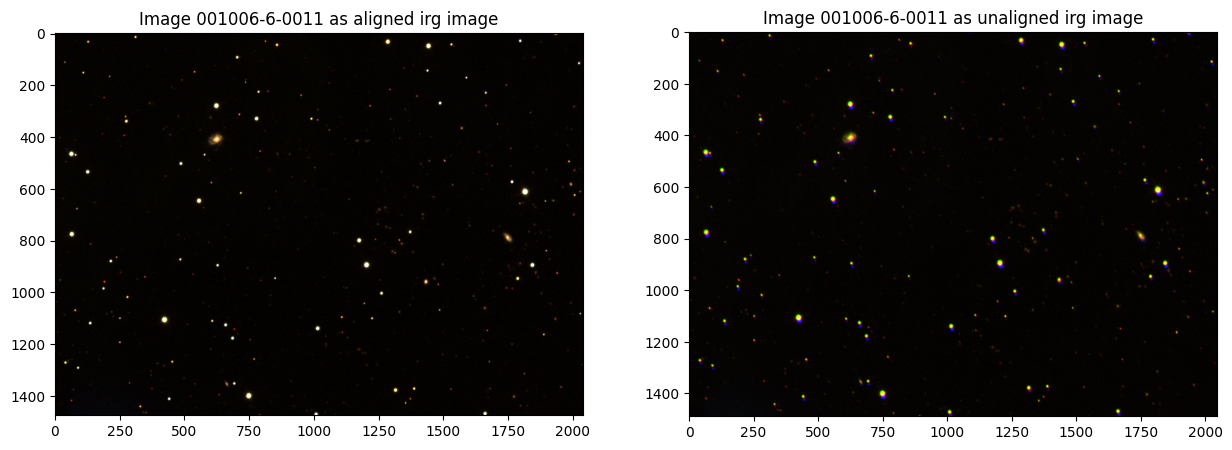

In [9]:
unaligned_img = []
for i in range(3):
    fits_file = fits.open(file_paths[i])
    unaligned_img.append(fits_file[0].data)
unaligned_img = np.stack(unaligned_img, axis=-1)

# Create interval object
interval = MinMaxInterval()
vmin, vmax = interval.get_limits(image[:,:,:3])

# Create an ImageNormalize object using a SqrtStretch object
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())

fig, ax = plt.subplots(1, 2, figsize=(15,15))

ax[0].imshow(image[:,:,:3], norm=norm)
ax[0].title.set_text(f"Image {file_to_use} as aligned irg image")

ax[1].imshow(unaligned_img[:,:,:3], norm=norm)
ax[1].title.set_text(f"Image {file_to_use} as unaligned irg image")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


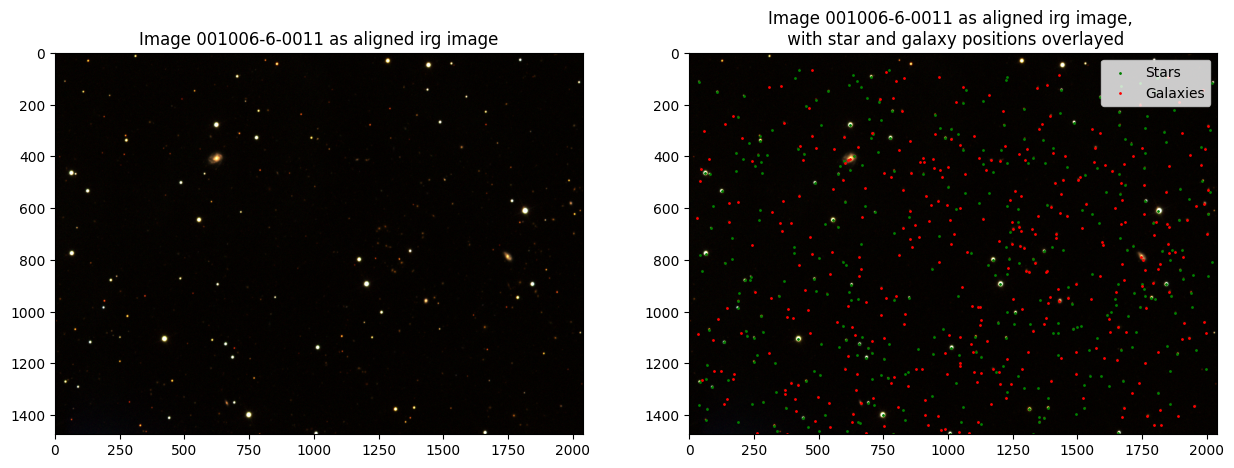

In [7]:
# Create interval object
interval = MinMaxInterval()
vmin, vmax = interval.get_limits(image[:,:,:3])

# Create an ImageNormalize object using a SqrtStretch object
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())

fig, ax = plt.subplots(1, 2, figsize=(15,15))

ax[0].imshow(image[:,:,:3], norm=norm)
ax[0].title.set_text(f"Image {file_to_use} as aligned irg image")


ax[1].scatter(stars[:,0], stars[:,1], color="green", s=1, label="Stars")
ax[1].scatter(galaxies[:,0], galaxies[:,1], color="red", s=1, label="Galaxies")
ax[1].imshow(image[:,:,:3], norm=norm)
ax[1].legend(loc='upper right')
ax[1].title.set_text(f"Image {file_to_use} as aligned irg image, \n with star and galaxy positions overlayed")
plt.show()

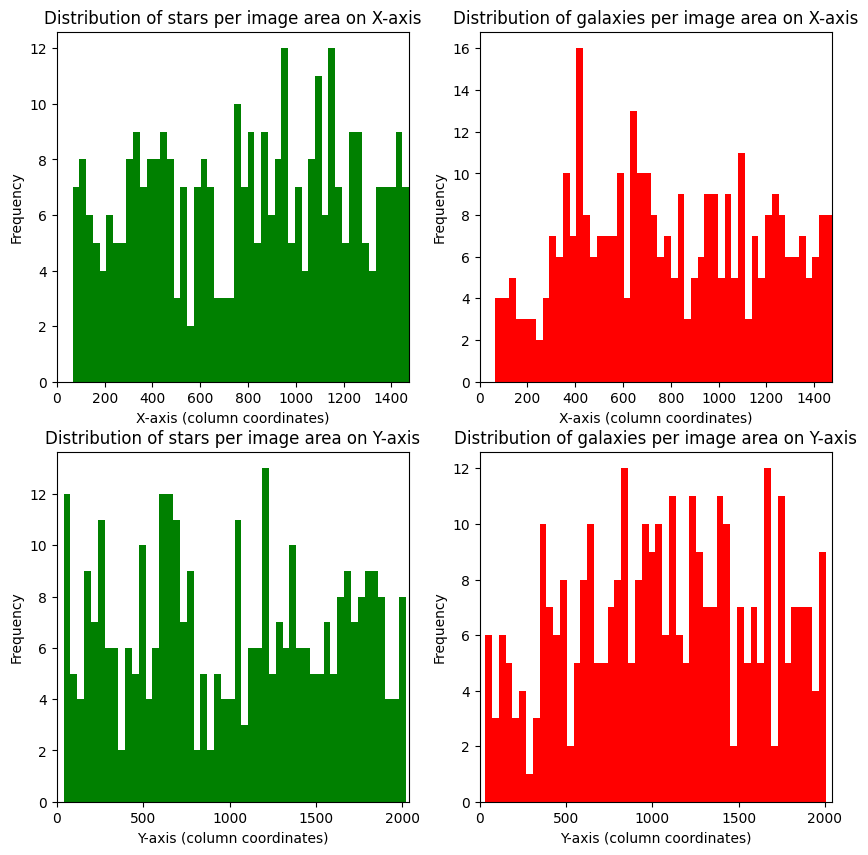

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0,0].hist(stars[:,1], bins=50, color='green')  # Adjust the number of bins as needed
ax[0,0].set_xlabel('X-axis (column coordinates)')
ax[0,0].set_ylabel('Frequency')
ax[0,0].title.set_text('Distribution of stars per image area on X-axis')
ax[0,0].set_xlim(0,1474)

ax[0,1].hist(galaxies[:,1], bins=50, color='red')  # Adjust the number of bins as needed
ax[0,1].set_xlabel('X-axis (column coordinates)')
ax[0,1].set_ylabel('Frequency')
ax[0,1].title.set_text('Distribution of galaxies per image area on X-axis')
ax[0,1].set_xlim(0,1474)

ax[1,0].hist(stars[:,0], bins=50, color='green')  # Adjust the number of bins as needed
ax[1,0].set_xlabel('Y-axis (column coordinates)')
ax[1,0].set_ylabel('Frequency')
ax[1,0].title.set_text('Distribution of stars per image area on Y-axis')
ax[1,0].set_xlim(0,2041)

ax[1,1].hist(galaxies[:,0], bins=50, color='red')  # Adjust the number of bins as needed
ax[1,1].set_xlabel('Y-axis (column coordinates)')
ax[1,1].set_ylabel('Frequency')
ax[1,1].title.set_text('Distribution of galaxies per image area on Y-axis')
ax[1,1].set_xlim(0,2041)


plt.show()